# EDA

In this file, we ivestigate the dataset to get a better picture of the data we are working with.

### Setup

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing and viewing the data

In [8]:
df = pd.read_csv('../Hannah/PreProcessedData.csv')

In [11]:
df[0:5]

,IMDbRating,Title,Year,Plot,Actors,Action,Adult,Adventure,Animation,Biography,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,7.1,Aberdeen,2000,"Kaisa is a Scot, a successful London lawyer, w...","Stellan Skarsgård, Lena Headey, Jean Johansson",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.1,The Asylum,2000,"Plagued by endless visions and nightmares, Jen...","Steffanie Pitt, Nick Waring, Ingrid Pitt",0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,6.6,The Beach,2000,Garland's novel centers on a young nicotine-ad...,"Leonardo DiCaprio, Tilda Swinton, Daniel York",0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,5.6,Beautiful Joe,2000,"In the Bronx, Joe (Sir Billy Connolly), an Iri...","Sharon Stone, Billy Connolly, Gil Bellows",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6.3,My Best Friend's Wedding,1997,"A woman who, by a promise made years earlier, ...","Julia Roberts, Dermot Mulroney, Cameron Diaz",0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [20]:
rows = len(df.axes[0])
cols = len(df.axes[1])

print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

Number of Rows:  6732
Number of Columns:  31


### IMDb rating

Let's first look at the distribution of IMDb ratings.



In [25]:
ratings = list(df.loc[:,"IMDbRating"])
print(ratings[:5])

[7.1, 4.1, 6.6, 5.6, 6.3]


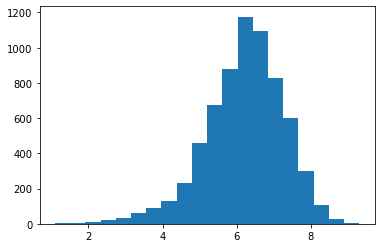

6.218820558526408

In [30]:
plt.hist(ratings, bins=20)
plt.show()
sum(ratings)/len(ratings)

The above histogram shows that the ratings approximately follow a bell curve slightly skewed towards higher scores. The average rating is just over 6, and most ratings are between 4 and 8, so we expect our model to predict mostly in this range. The fact that there is a good spread of ratings, rather than a few numbers dominating the dataset, is good news for our prediction problem as it means that we can't obtain a high accuracy on the training data by predicting the same value for each observation.

### Year

Next let's look at the years the films were released. 

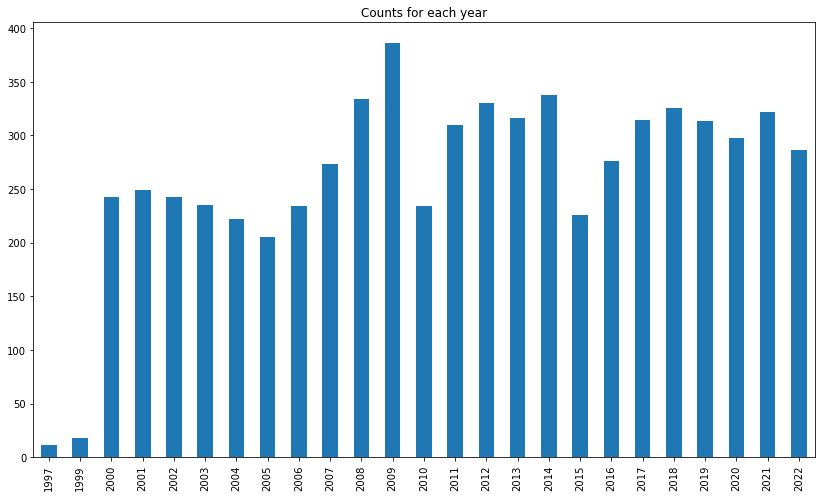

In [42]:
#grabbing the year column
v1 = df[['Year']] 
#filtering values appearing more than 10 times
v2 = df[v1.replace(v1.stack().value_counts()).gt(10).all(1)]
#plot counts
ax = v2['Year'].value_counts().sort_index().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Counts for each year")

The most common year for films in our dataset is 2008, however we have a good amount of films from each year from 200 onwards.

Do IMDb ratings vary by year?

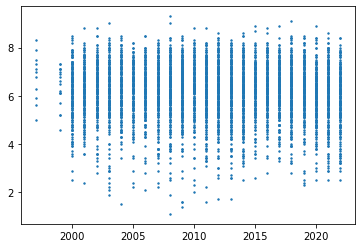

In [52]:
plt.scatter(v2['Year'], v2['IMDbRating'], s= 2)
plt.show()

The year doesn't appear to make much difference to the imdb rating.

### Genres

In [62]:
# remove irrelevant columns
df2 = df.drop(columns=["IMDbRating", "Title", "Year", "Plot", "Actors"]) 
# get column sums
counts = df2.sum(0)
counts

Action         1380
Adult             1
Adventure      1076
Animation       366
Biography       556
Comedy         2475
Crime          1069
Documentary     334
Drama          3583
Family          369
Fantasy         433
Film-Noir         6
History         232
Horror          780
Music           271
Musical          72
Mystery         619
News              3
Reality-TV        1
Romance        1072
Sci-Fi          420
Short            35
Sport           188
Thriller       1078
War             110
Western          31
dtype: int64

<BarContainer object of 26 artists>

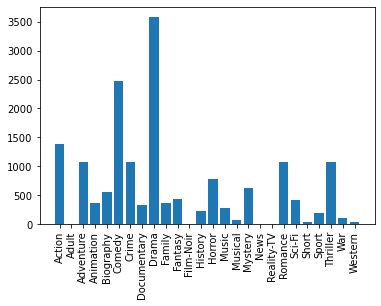

In [68]:
plt.xticks(rotation='vertical')
plt.bar(counts.index, counts.values)

In [ ]:
We can see that the most common film genre is the rather vague 'drama'